### Predicting Employee Attrition in the Workplace

#### Import the necessary packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_auc_score
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 500)

#### Load the dataset

In [2]:
df = pd.read_csv('HR-Employee-Attrition.csv')

#### First 5 observations

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993.0,19479,8,Y,Yes,11.0,3.0,1.0,80,0,8.0,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130.0,24907,1,Y,No,23.0,4.0,4.0,80,1,10.0,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090.0,2396,6,Y,Yes,15.0,3.0,2.0,80,0,7.0,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909.0,23159,1,Y,Yes,11.0,3.0,3.0,80,0,8.0,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468.0,16632,9,Y,No,12.0,3.0,4.0,80,1,6.0,3,3,2,2,2,2


#### Dimension of the data

In [4]:
df.shape

(1470, 35)

#### Structure of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

##### Missing Values

In [6]:
df.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               5
MonthlyIncome               4
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    1
PercentSalaryHike           1
PerformanceRating           3
RelationshipSatisfaction    3
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           1
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

We have missing values in marital status, monthly rate, over time, percent salary hike, performance rating, relationship satisfaction, total working years. The missing values are many hence we have to handle them using appropriate approach.

#### 1. Descriptive Statistics

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [8]:
descriptive_columns = ['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
                     'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'YearsAtCompany',
                     'NumCompaniesWorked', 'MonthlyIncome', 'WorkLifeBalance', 
                      'PerformanceRating','YearsSinceLastPromotion']
des_df = df[descriptive_columns]
des_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.00,3.0,4.00,4.0
YearsAtCompany,1470.0,7.008163,6.126525,0.0,3.00,5.0,9.00,40.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.00,2.0,4.00,9.0
MonthlyIncome,1466.0,6504.956344,4708.052527,1009.0,2914.75,4933.0,8379.00,19999.0


#### Data Preprocessing

In [9]:
def check_unique(df):
    nunique=df.apply(lambda col: col.nunique())
    unique_values = df.apply(lambda col: col.unique())
    df_check = pd.DataFrame({'uni_count': nunique, 'unique_values': unique_values})
    return df_check

check_unique(df)

,uni_count,unique_values
Age,43,"[41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2..."
Attrition,2,"[Yes, No]"
BusinessTravel,3,"[Travel_Rarely, Travel_Frequently, Non-Travel]"
DailyRate,886,"[1102, 279, 1373, 1392, 591, 1005, 1324, 1358,..."
Department,3,"[Sales, Research & Development, Human Resources]"
DistanceFromHome,29,"[1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5..."
Education,5,"[2, 1, 4, 3, 5]"
EducationField,6,"[Life Sciences, Other, Medical, Marketing, Tec..."
EmployeeCount,1,[1]
EmployeeNumber,1470,"[1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,..."


##### Handing missing values 

In [10]:
categorical_columns = ['MaritalStatus', 'OverTime']
numerical_columns = ['PerformanceRating', 'RelationshipSatisfaction','MonthlyIncome','PercentSalaryHike','TotalWorkingYears']

# Fill with mode
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)
# Fill with median
for col in numerical_columns:
    df[col].fillna(df[col].median(), inplace=True)

    
df.isnull().sum()    

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

##### Handling Duplicates

In [11]:
columns_remove = ['EmployeeCount', 'Over18', 'StandardHours']
df.drop(columns=columns_remove, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EmployeeNumber            1470 non-null   int64  
 9   EnvironmentSatisfaction   1470 non-null   int64  
 10  Gender                    1470 non-null   object 
 11  HourlyRate                1470 non-null   int64  
 12  JobInvolvement            1470 non-null   int64  
 13  JobLevel                  1470 non-null   int64  
 14  JobRole 

In [13]:
# Drop performance rating since it has only 2 values ( 3 and 4)
df.drop(columns=['PerformanceRating'], inplace=True)

### Data Visualization

In [14]:
# A function to plot the categorical variables
def plot_categorical_analysis(df, feature, label_rotation=False, horizontal_layout=True):
    sns.set(font_scale=1)
    category_counts = df[feature].value_counts()
    df_category_counts = pd.DataFrame({feature: category_counts.index, 'Number of Employees': category_counts.values})

    try:
        df['Attrition_numeric'] = df['Attrition'].map({'Yes': 1, 'No': 0})
        category_percentage = df[[feature, 'Attrition_numeric']].groupby([feature], as_index=False).mean()
        category_percentage.sort_values(by='Attrition_numeric', ascending=False, inplace=True)
    except ValueError:
        print(f"Skipping {feature} due to non-numeric Attrition values.")
        return
    if horizontal_layout:
        sns.set(font_scale=1.5)
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
    else:
        sns.set(font_scale=1.5)
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20, 10))

    sns.set_color_codes("pastel")
    bar_chart = sns.barplot(ax=ax1, x=feature, y="Number of Employees", data=df_category_counts)
    if label_rotation:
        bar_chart.set_xticklabels(bar_chart.get_xticklabels(), rotation=90)

    bar_chart_percentage = sns.barplot(ax=ax2, x=feature, y='Attrition_numeric', data=category_percentage)
    if label_rotation:
        bar_chart_percentage.set_xticklabels(bar_chart_percentage.get_xticklabels(), rotation=90)

    plt.ylabel('Percent of Attrition [%]')
    plt.tick_params(axis='both', which='major')
    plt.subplots_adjust(wspace=0.2, top=0.9)
    plt.show()
    df.drop('Attrition_numeric', axis=1, inplace=True)

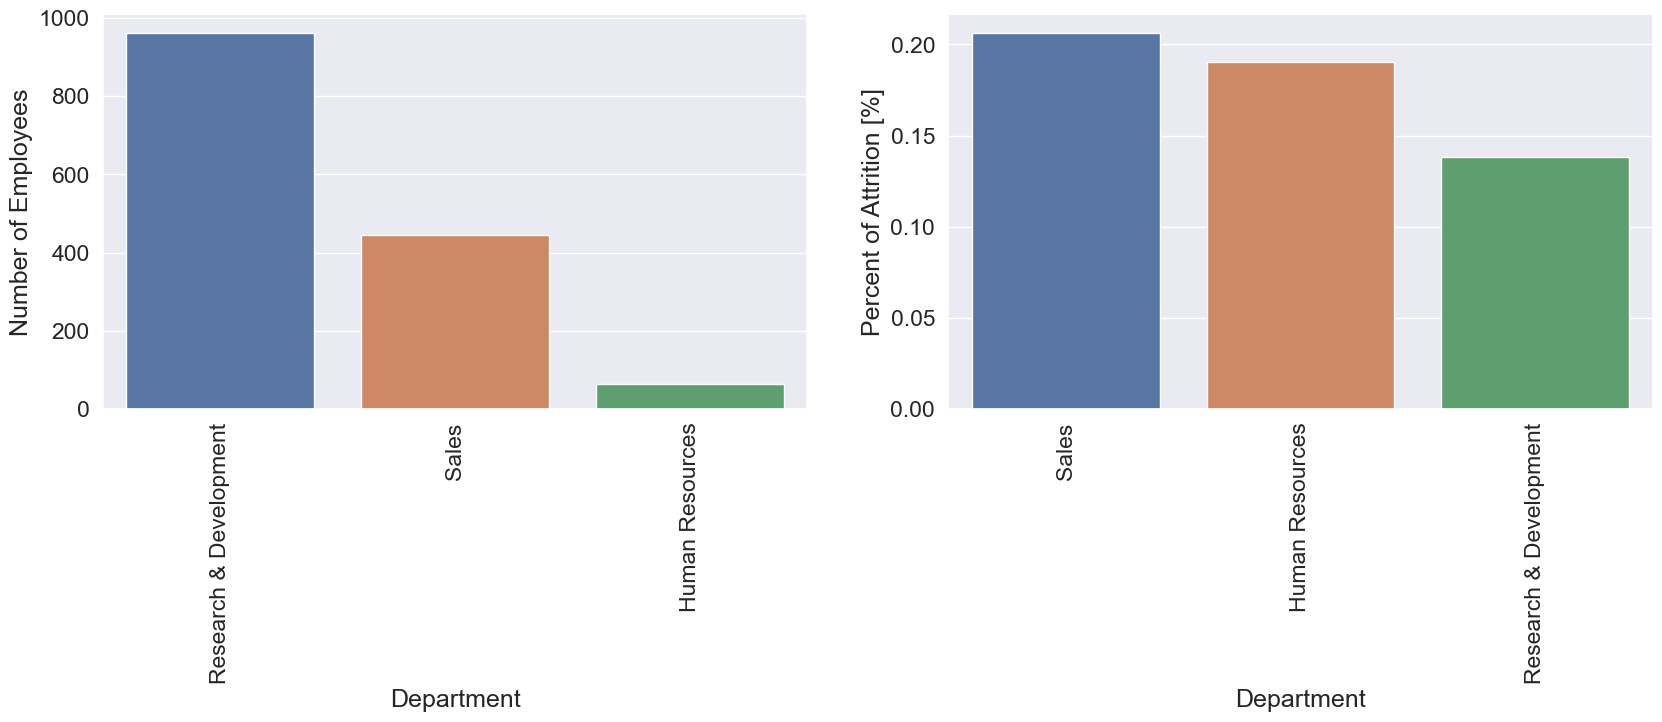

In [15]:
plot_categorical_analysis(df, 'Department', label_rotation=True, horizontal_layout=True)

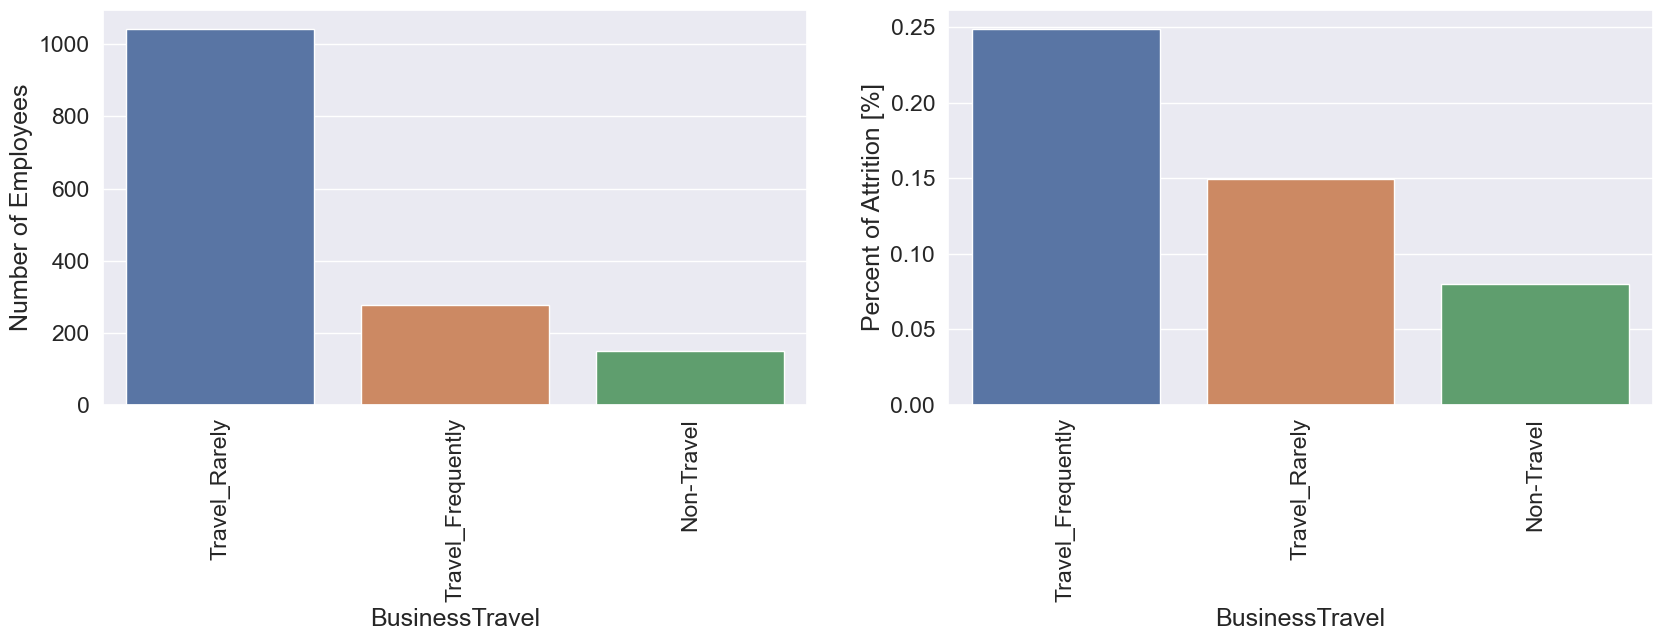

In [16]:
plot_categorical_analysis(df, 'BusinessTravel', label_rotation=True, horizontal_layout=True)

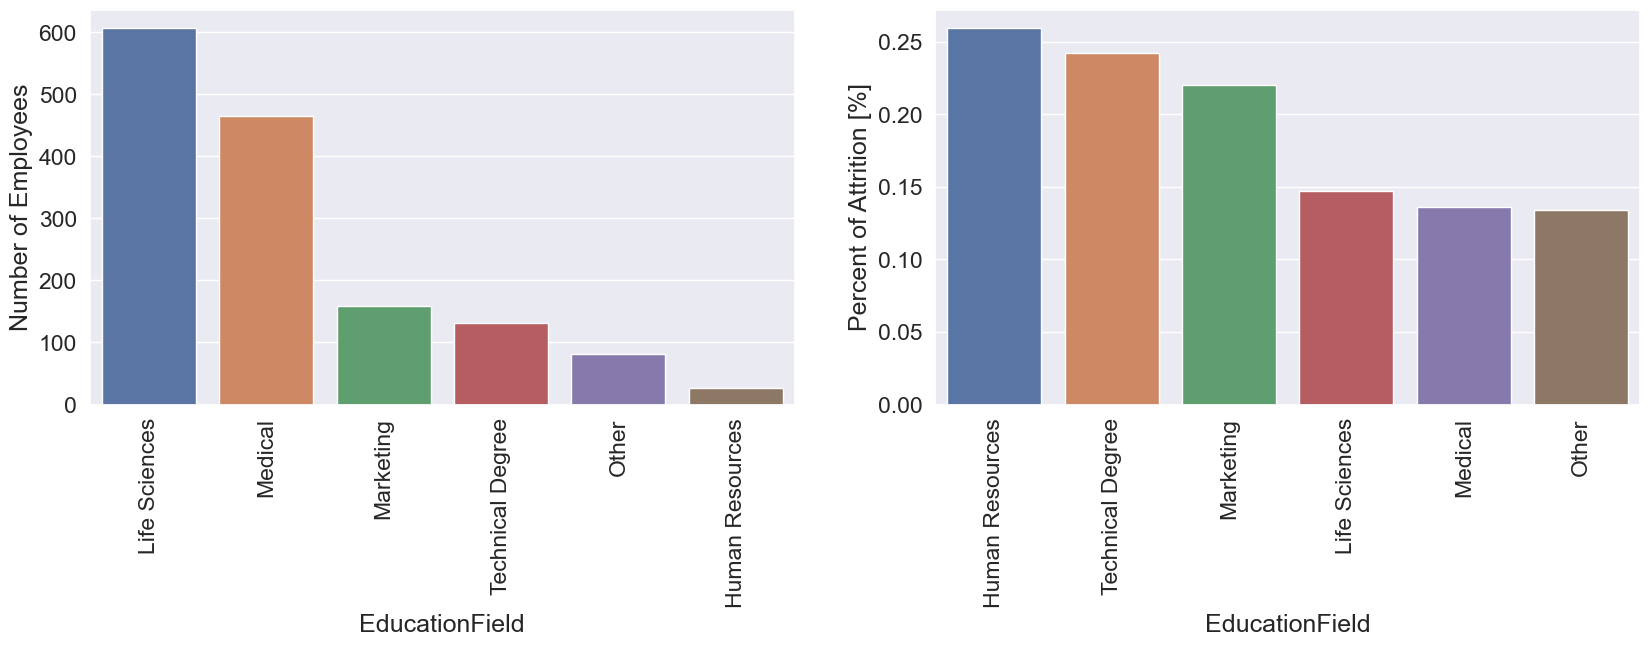

In [17]:
plot_categorical_analysis(df, 'EducationField', label_rotation=True, horizontal_layout=True)

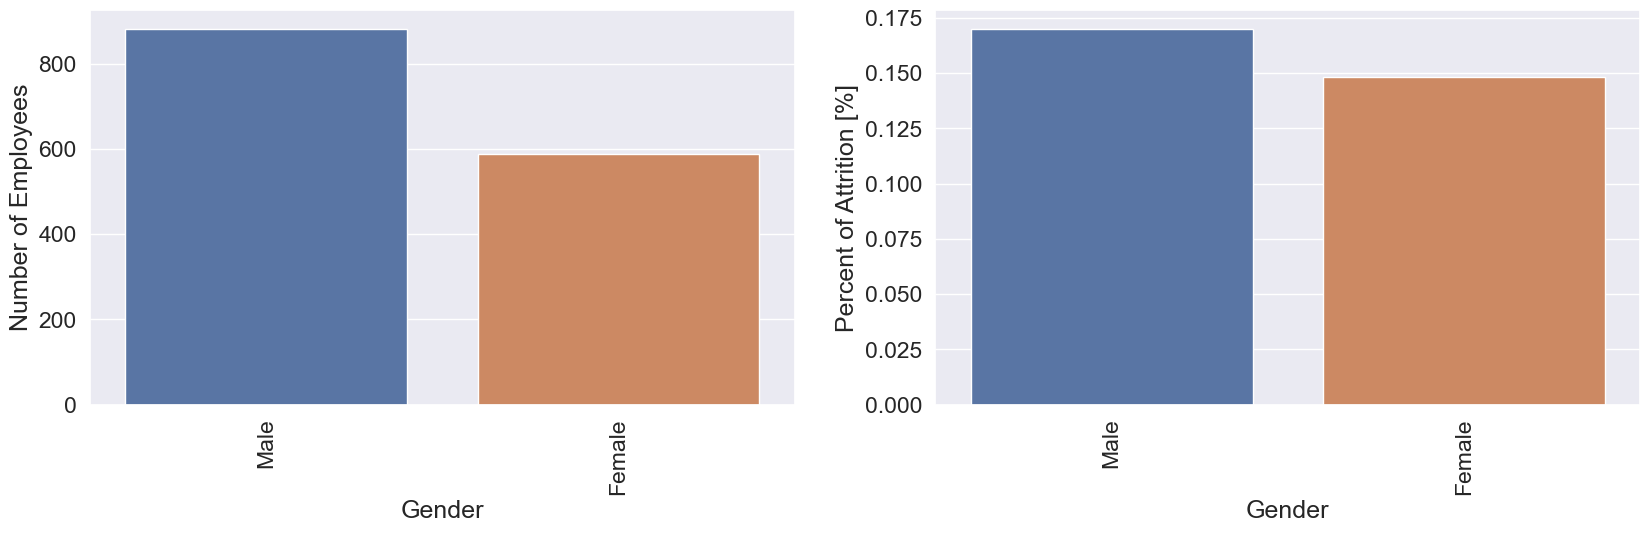

In [18]:
plot_categorical_analysis(df, 'Gender', label_rotation=True, horizontal_layout=True)

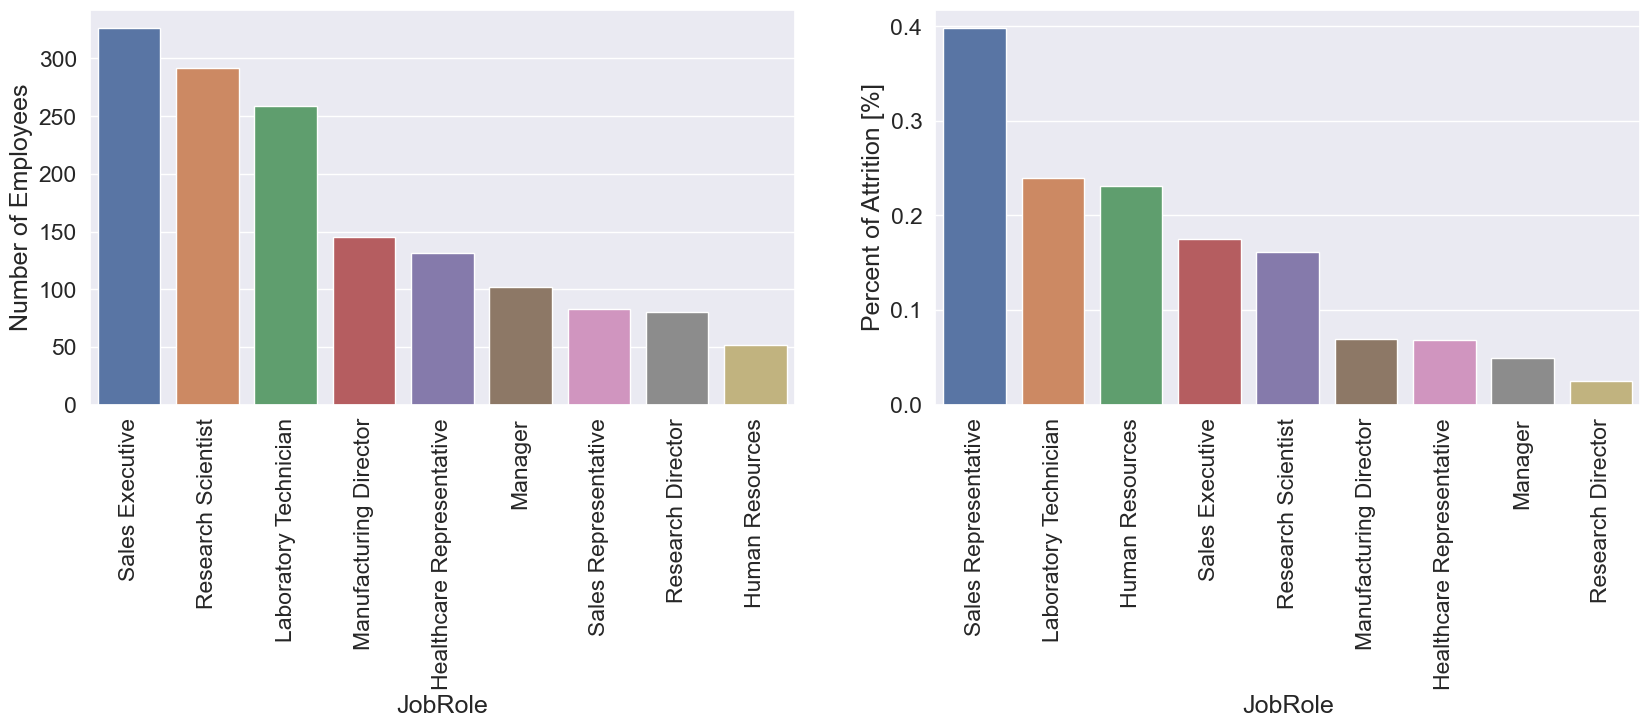

In [19]:
plot_categorical_analysis(df, 'JobRole', label_rotation=True, horizontal_layout=True)

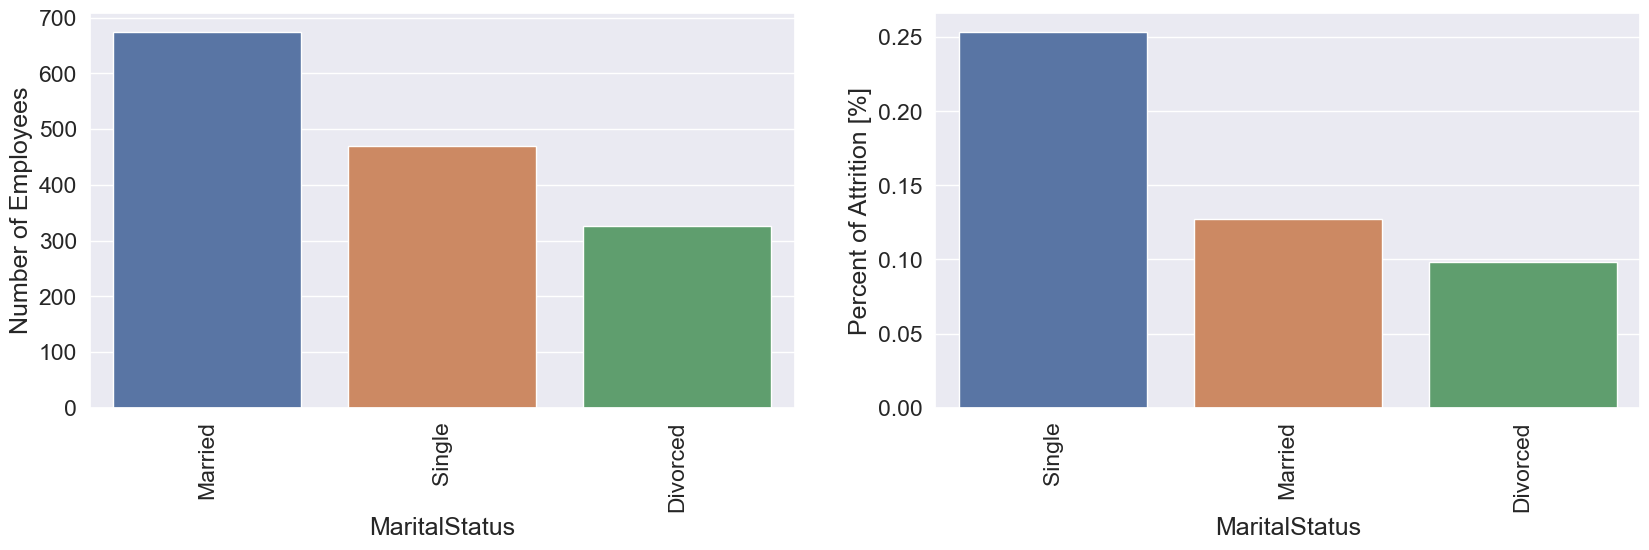

In [20]:
plot_categorical_analysis(df, 'MaritalStatus', label_rotation=True, horizontal_layout=True)

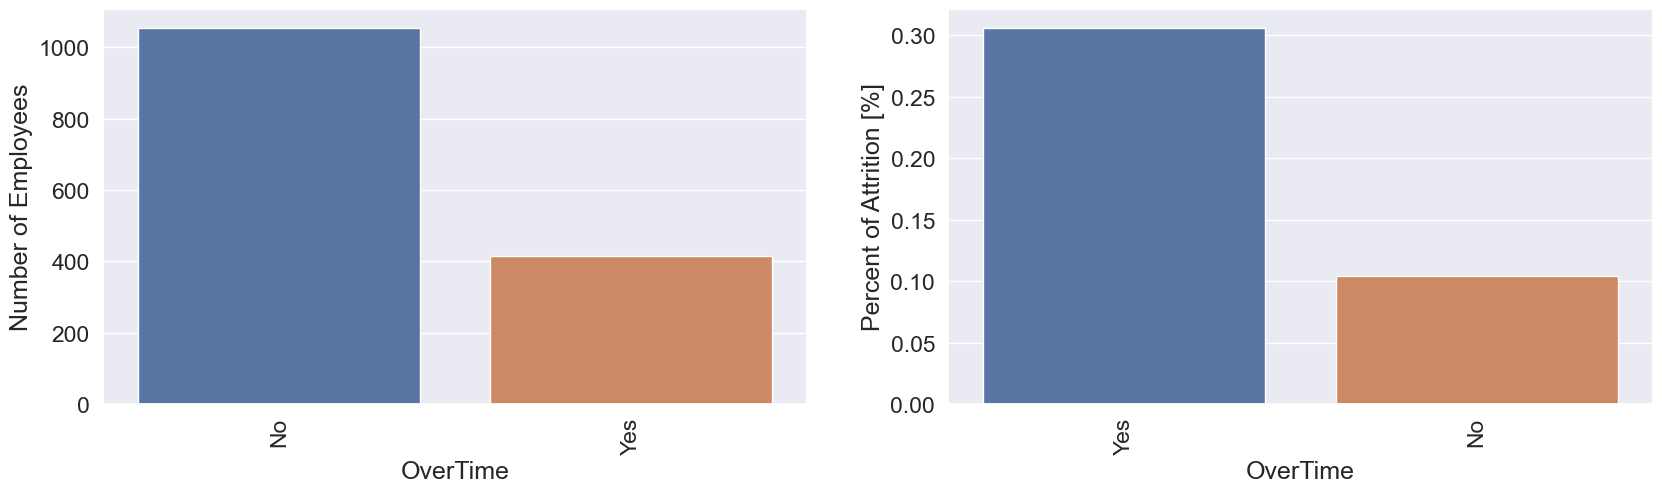

In [21]:
plot_categorical_analysis(df, 'OverTime', label_rotation=True, horizontal_layout=True)

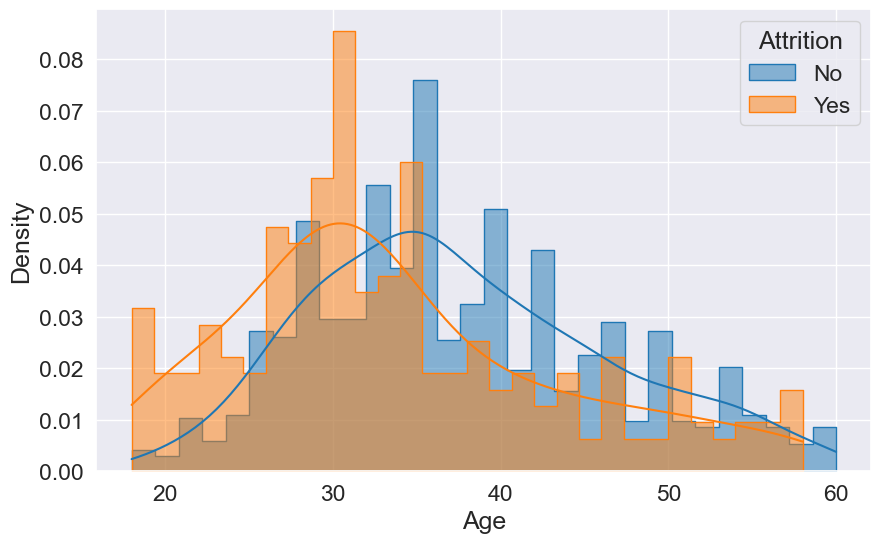

In [22]:
features = ["Age"]
colors = {"Yes": "#ff7f0e", "No": "#1f77b4"}
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['Attrition'] == 'No'], x="Age", kde=True, color=colors["No"], label="No", element="step", stat="density", common_norm=False, bins=30)
sns.histplot(data=df[df['Attrition'] == 'Yes'], x="Age", kde=True, color=colors["Yes"], label="Yes", element="step", stat="density", common_norm=False, bins=30)
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend(title="Attrition")
plt.show()


In [23]:
# Function to create boxplots (Numerical visualization)
def plot_boxplot(df, numerical_column, target_variable='Attrition'):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=target_variable, y=numerical_column, data=df)
    plt.show()

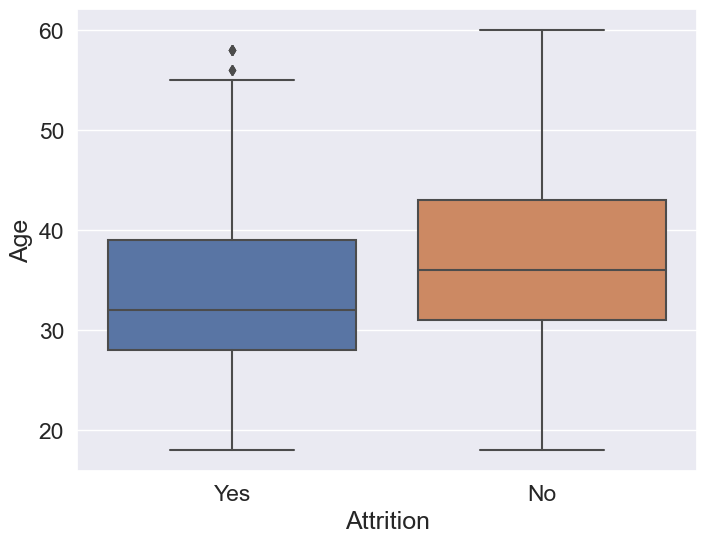

In [24]:
plot_boxplot(df, 'Age')

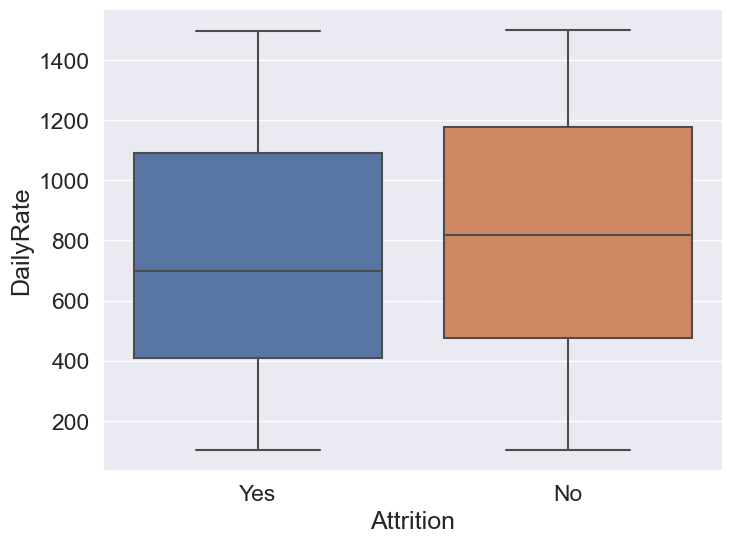

In [25]:
plot_boxplot(df, 'DailyRate')

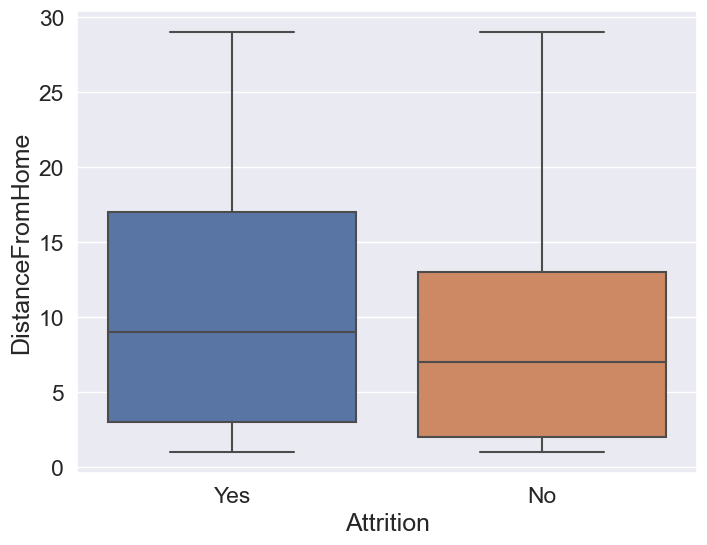

In [26]:
plot_boxplot(df, 'DistanceFromHome')

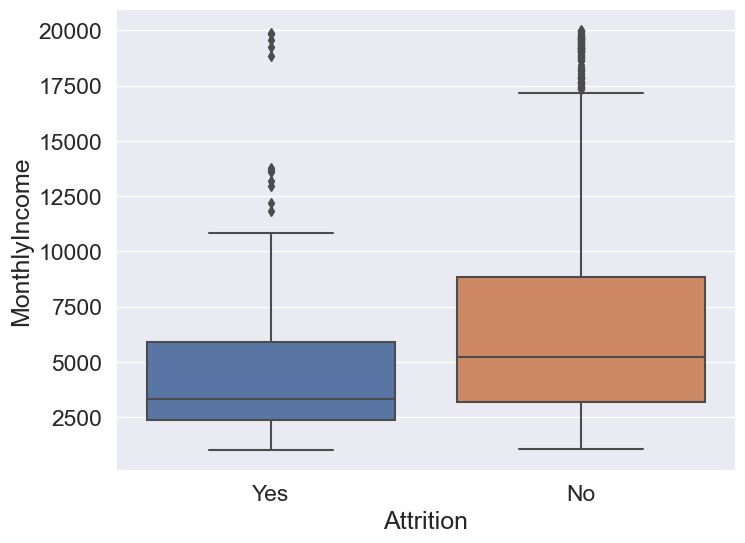

In [27]:
plot_boxplot(df,'MonthlyIncome')

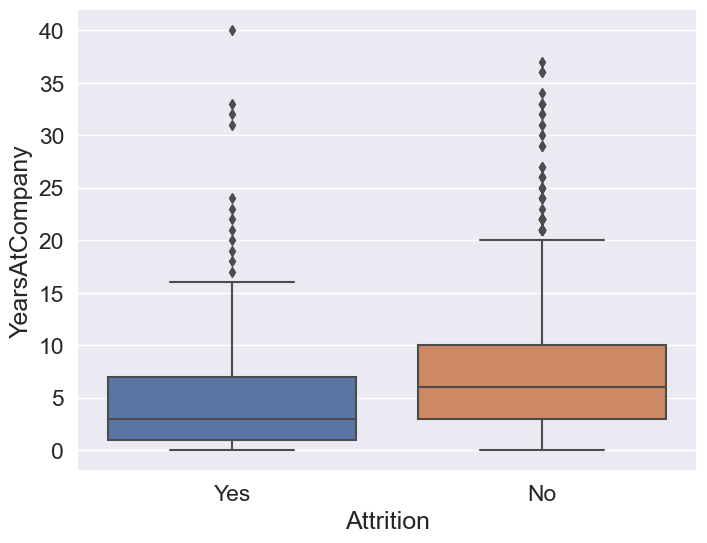

In [28]:
plot_boxplot(df,'YearsAtCompany')

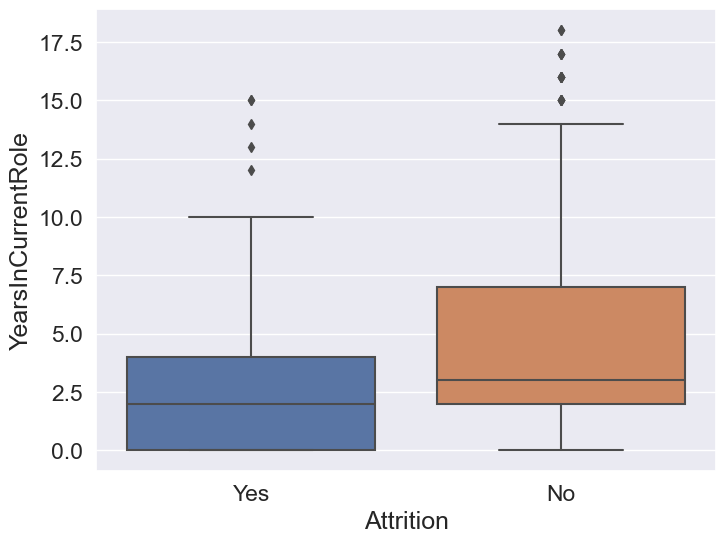

In [29]:
plot_boxplot(df,'YearsInCurrentRole')

#### Handling the outliers

In [30]:
def remove_outliers(df, numerical_column, target_variable='Attrition', multiplier=1.5):
    # Calculate the IQR 
    Q1 = df[numerical_column].quantile(0.25)
    Q3 = df[numerical_column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    df_no_outliers = df[(df[numerical_column] >= lower_bound) & (df[numerical_column] <= upper_bound)]
    num_outliers_removed = len(df) - len(df_no_outliers)
    print(f"Removed {num_outliers_removed} outliers from {numerical_column} column.")
    print("Shape after removing outliers:", df_no_outliers.shape)

In [31]:
df_no_outliers = remove_outliers(df, 'MonthlyIncome')

Removed 115 outliers from MonthlyIncome column.
Shape after removing outliers: (1355, 31)


##### Correlation Heatmap

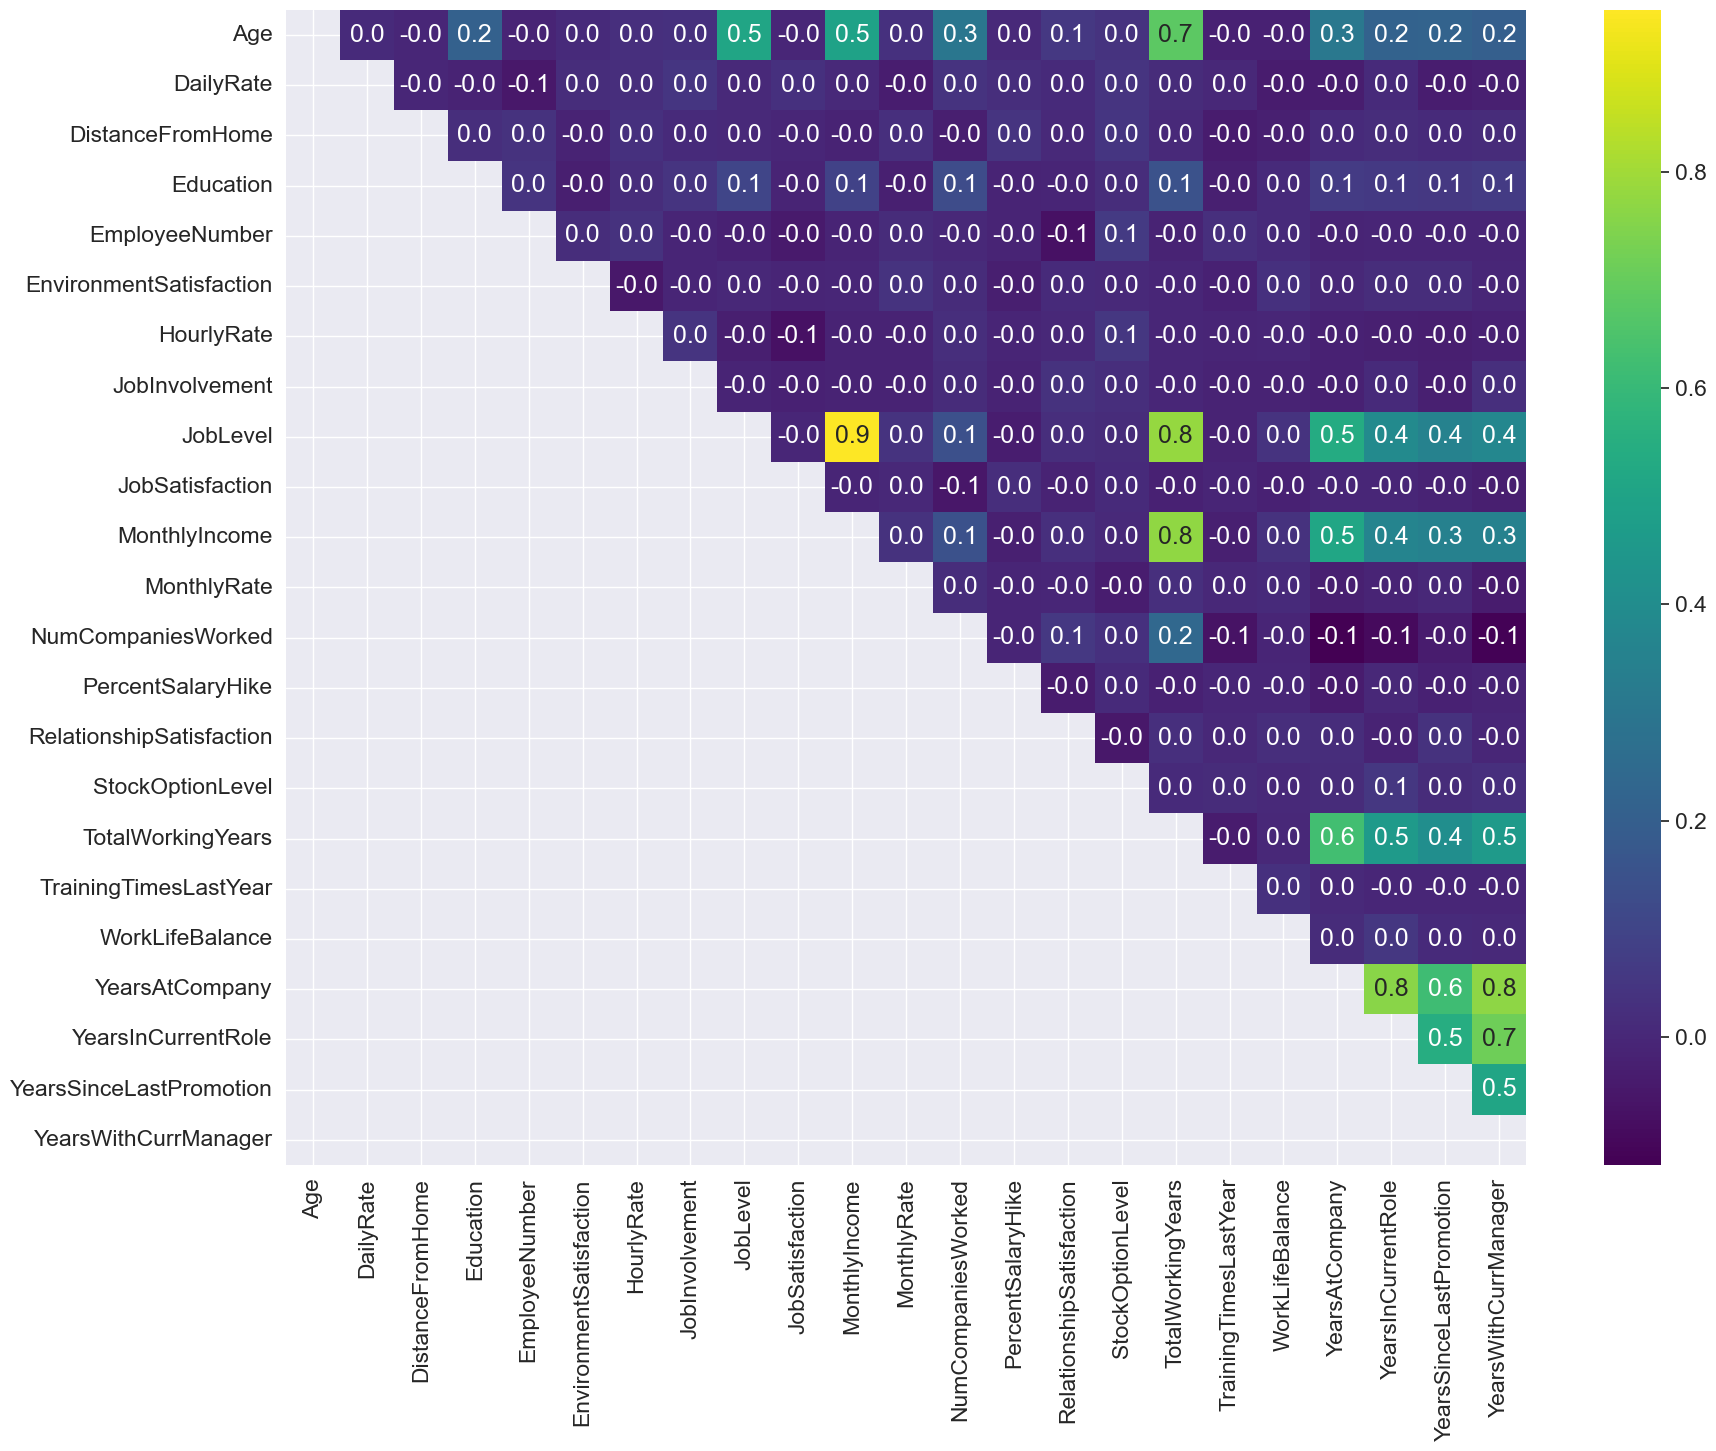

In [32]:
def mask_upper_triangle(matrix):
    mask = np.tri(matrix.shape[0], k=0, dtype=bool)
    matrix[mask] = np.nan
    return matrix
numerical_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(20, 15))
sns.heatmap(mask_upper_triangle(numerical_df.corr()), annot=True, fmt=".1f", cmap="viridis", mask=False)
plt.show()

* Pairs of highly correlated features

    ('JobLevel', 'MonthlyIncome'), ('JobLevel', 'TotalWorkingYears'), ('MonthlyIncome', 'TotalWorkingYears'), ('YearsAtCompany', 'YearsInCurrentRole'), ('YearsAtCompany', 'YearsWithCurrManager'), ('YearsInCurrentRole', 'YearsWithCurrManager')

#### Feature Engineering using Label Encoder

In [33]:
df_c = df.copy()
df_c.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993.0,19479,8,Yes,11.0,1.0,0,8.0,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130.0,24907,1,No,23.0,4.0,1,10.0,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090.0,2396,6,Yes,15.0,2.0,0,7.0,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909.0,23159,1,Yes,11.0,3.0,0,8.0,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468.0,16632,9,No,12.0,4.0,1,6.0,3,3,2,2,2,2


In [34]:
label_encoder = LabelEncoder()
for column in df_c.columns:
    if df_c[column].dtype == 'object':
        df_c[column] = label_encoder.fit_transform(df_c[column])
df_c.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993.0,19479,8,1,11.0,1.0,0,8.0,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,5130.0,24907,1,0,23.0,4.0,1,10.0,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2090.0,2396,6,1,15.0,2.0,0,7.0,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,0,56,3,1,6,3,1,2909.0,23159,1,1,11.0,3.0,0,8.0,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,1,40,3,1,2,2,1,3468.0,16632,9,0,12.0,4.0,1,6.0,3,3,2,2,2,2


### Models Building

In [35]:
# Standardize
X = df_c.drop('Attrition', axis=1)
y = df_c['Attrition']
# StandardScaler
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_standardized.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.590048,0.742527,1.401512,-1.010909,-0.891688,-0.937414,-1.701283,-0.660531,-1.224745,1.383138,0.379672,-0.057788,1.032716,1.153254,1.238403,-0.108000,0.726020,2.125136,1.594418,-1.150191,-1.586953,-0.932014,-0.422289,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-0.913194,-1.297775,-0.493817,-0.147150,-1.868426,-0.937414,-1.699621,0.254625,0.816497,-0.240677,-1.026167,-0.057788,0.626374,-0.660853,-0.133453,-0.291587,1.488876,-0.678049,-0.627188,2.132348,1.193525,0.241988,-0.165084,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,0.590048,1.414363,-0.493817,-0.887515,-0.891688,1.316673,-1.696298,1.169781,0.816497,1.284725,-1.026167,-0.961486,-0.998992,0.246200,1.238403,-0.938292,-1.674841,1.324226,1.594418,-0.056012,-0.660127,-0.932014,-0.550892,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,-0.913194,1.461466,-0.493817,-0.764121,1.061787,-0.937414,-1.694636,1.169781,-1.224745,-0.486709,0.379672,-0.961486,0.626374,0.246200,-0.133453,-0.764065,1.243211,-0.678049,1.594418,-1.150191,0.266699,-0.932014,-0.422289,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,0.590048,-0.524295,-0.493817,-0.887515,-1.868426,0.565311,-1.691313,-1.575686,0.816497,-1.274014,0.379672,-0.961486,-0.998992,-0.660853,-0.133453,-0.645148,0.325900,2.525591,-0.627188,-0.876646,1.193525,0.241988,-0.679495,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227


 ##### Split the data set into training and testing

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

In [37]:
# 1. Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_predictions = logreg_model.predict(X_test)

# 2. Support Vector Classifier
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_predictions = svc_model.predict(X_test)

# 3. Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

# 4. Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# 5. Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

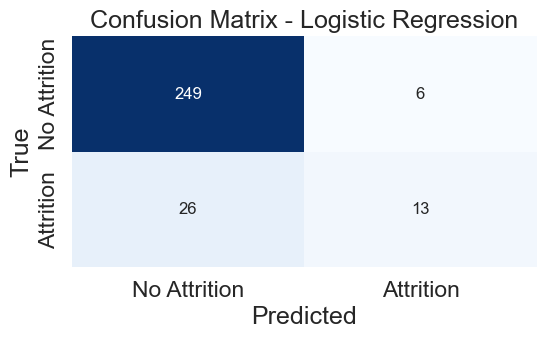

Model: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       255
           1       0.68      0.33      0.45        39

    accuracy                           0.89       294
   macro avg       0.79      0.65      0.69       294
weighted avg       0.88      0.89      0.87       294



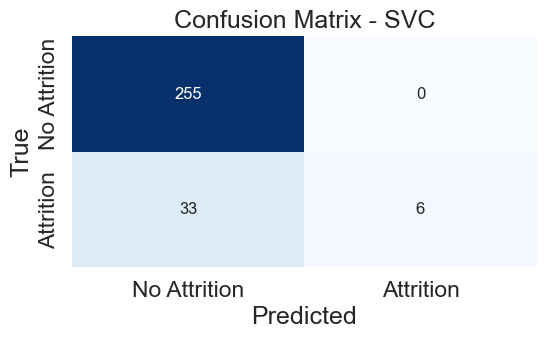

Model: SVC
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       255
           1       1.00      0.15      0.27        39

    accuracy                           0.89       294
   macro avg       0.94      0.58      0.60       294
weighted avg       0.90      0.89      0.85       294



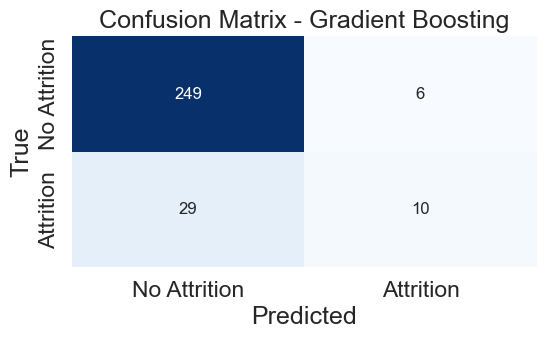

Model: Gradient Boosting
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.93       255
           1       0.62      0.26      0.36        39

    accuracy                           0.88       294
   macro avg       0.76      0.62      0.65       294
weighted avg       0.86      0.88      0.86       294



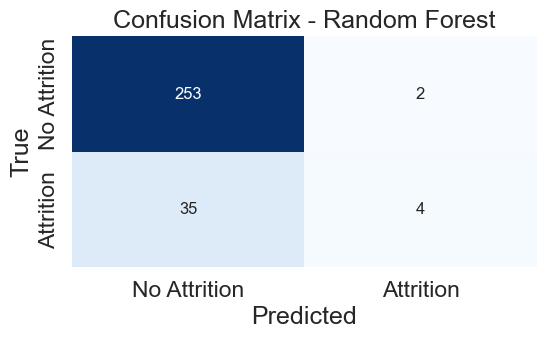

Model: Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.67      0.10      0.18        39

    accuracy                           0.87       294
   macro avg       0.77      0.55      0.55       294
weighted avg       0.85      0.87      0.83       294



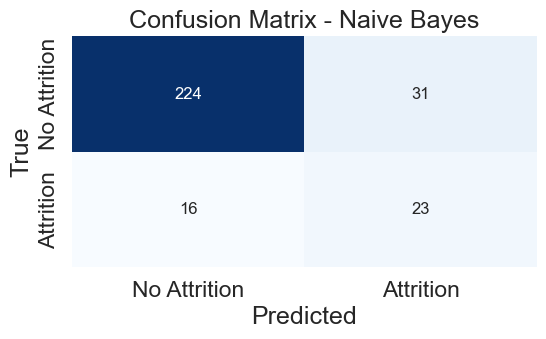

Model: Naive Bayes
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.91       255
           1       0.43      0.59      0.49        39

    accuracy                           0.84       294
   macro avg       0.68      0.73      0.70       294
weighted avg       0.87      0.84      0.85       294



In [38]:
models = {
    'Logistic Regression': logreg_predictions,
    'SVC': svc_predictions,
    'Gradient Boosting': gb_predictions,
    'Random Forest': rf_predictions,
    'Naive Bayes': nb_predictions
}

for model_name, predictions in models.items():
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(6, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                annot_kws={'fontsize': 12}, 
                xticklabels=['No Attrition', 'Attrition'],
                yticklabels=['No Attrition', 'Attrition'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    report = classification_report(y_test, predictions)
    print(f"Model: {model_name}")
    print("=" * 100)
    print(f"Classification Report:\n{report}")
    print("=" * 100)

#### Peformance table

In [39]:
model_names = []
accuracies = []
roc_scores = []

for model_name, predictions in models.items():
    cm = confusion_matrix(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)
    roc_score = roc_auc_score(y_test, predictions)
    model_names.append(model_name)
    accuracies.append(accuracy)
    roc_scores.append(roc_score)
model_df = pd.DataFrame({'Model Name': model_names, 'Accuracy': accuracies, 'ROC': roc_scores})
model_df

,Model Name,Accuracy,ROC
0,Logistic Regression,0.891156,0.654902
1,SVC,0.887755,0.576923
2,Gradient Boosting,0.880952,0.616440
3,Random Forest,0.874150,0.547360
4,Naive Bayes,0.840136,0.734087


#### Feature Importance - Random Forest

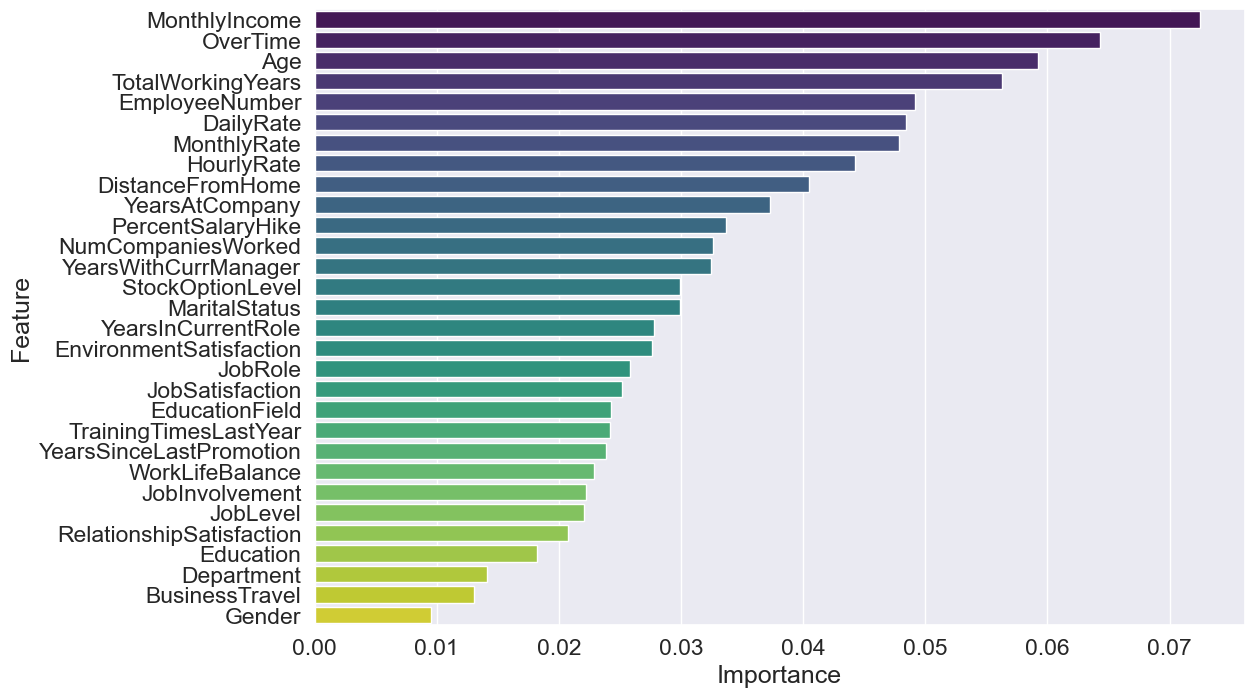

In [40]:
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [41]:
feature_importance_df

,Feature,Importance
16,MonthlyIncome,0.072518
19,OverTime,0.064330
0,Age,0.059226
23,TotalWorkingYears,0.056314
7,EmployeeNumber,0.049189
2,DailyRate,0.048404
17,MonthlyRate,0.047831
10,HourlyRate,0.044221
4,DistanceFromHome,0.040474
26,YearsAtCompany,0.037244
